/home/flowers-user/anaconda3/envs/adtool/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
unet/diffusion_pytorch_model.safetensors not found
100%|██████████| 4/4 [00:13<00:00,  3.38s/it]


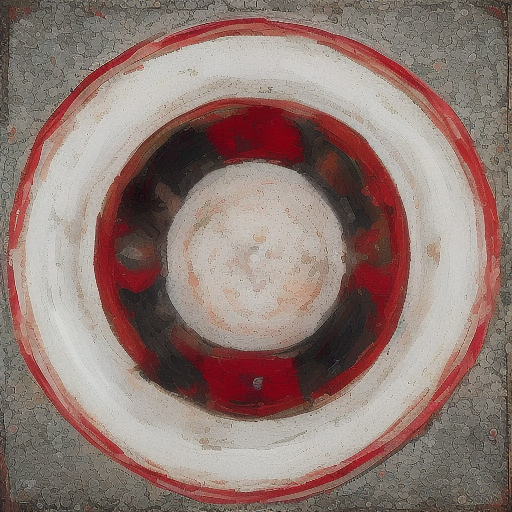

In [1]:
from peft import PeftModel
from diffusers import LCMScheduler, AutoPipelineForText2Image

#SET seed
import torch
torch.manual_seed(0)

model_id = "segmind/tiny-sd"
adapter_id = "akameswa/lcm-lora-tiny-sd"

pipe = AutoPipelineForText2Image.from_pretrained(model_id)
pipe.scheduler = LCMScheduler.from_config(pipe.scheduler.config)
pipe

PeftModel.from_pretrained(pipe.unet, adapter_id)



prompt = "red circle"
image = pipe(prompt=prompt, num_inference_steps=4, guidance_scale=1.0).images[0]
display(image)


In [10]:
image.size

(512, 512)

In [2]:
#use a tensor as input
import pickle

txt_seed= pickle.load(open("../../txt_seed.pkl", "rb"))

In [1]:
embbed=pipe.encode_prompt(
            "red circle",
            'cpu',
            1,
        False
        )[0]
neutral = pipe.encode_prompt(
            "",
            'cpu',
            1,
        False
        )[0]
#concatenate the two tensors
import torch

truetxtseed=torch.cat([embbed,neutral],dim=0)
#save as pickle

pickle.dump(truetxtseed, open("../../truetxtseed.pkl", "wb"))

NameError: name 'pipe' is not defined

In [24]:
#use txt_seed as text embedding in the pipeline
output = pipe("red circle", num_inference_steps=1)

100%|██████████| 1/1 [00:07<00:00,  7.21s/it]


In [4]:
#load output.pkle
import pickle
output = pickle.load(open("../../output.pkl", "rb"))

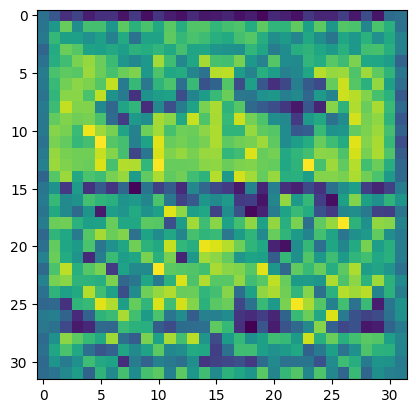

In [5]:
# plot tensor
import matplotlib.pyplot as plt
plt.imshow(output[0][0])

In [6]:
from PIL import Image

def _decode_image(self, latent):
    # some magic scale which controls blurriness of output
    latent = 1 / 0.18215 * latent
    with torch.no_grad():
        image = self.vae.decode(latent).sample
    image = (image / 2 + 0.5).clamp(0, 1).squeeze()
    image = image.detach().cpu().permute(1, 2, 0).numpy()
    image = (image * 255).round().astype("uint8")
    return Image.fromarray(image)


In [7]:
decoded=_decode_image(pipe,output)

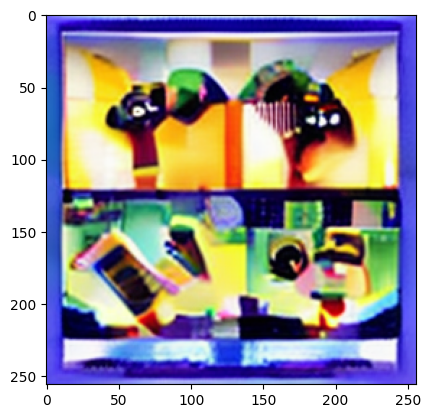

In [8]:
plt.imshow(decoded)